In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
sound_file = './sound/beep-01a.wav'

In [2]:
# Commodities
commodities_metadata = pd.read_csv('Commodities_metadata.csv')
commodities_data = pd.read_csv('Commodities_data.csv')

In [3]:
print commodities_metadata.Ticker.values
#print commodities_data.columns.values

['BUT1_Comdty' 'C_1_COMB_Comdty' 'CC1_COMB_Comdty' 'CL1_COMB_Comdty'
 'HG1_COMB_Comdty' 'JO1_Comdty' 'KC2_Comdty' 'LA1_Comdty' 'LH1_COMB_Comdty'
 'LN1_Comdty' 'O_1_COMB_Comdty' 'RR1_COMB_Comdty' 'S_1_COMB_Comdty'
 'SB1_Comdty' 'W_1_COMB_Comdty']


In [4]:
print commodities_data.columns.values

['Ticker' 'Date' 'Open' 'High' 'Low']


In [5]:
print commodities_data.Date.min(), commodities_data.Date.max()

2004-09-01 2014-08-29


In [6]:
commodities_price_series = commodities_data.groupby(['Date', 'Ticker']).Open.mean().unstack()

In [7]:
commodities_price_series.head()

Ticker,BUT1_Comdty,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LA1_Comdty,LH1_COMB_Comdty,LN1_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Date,,,,,,,,,,,,,,,
2004-09-01,NaN,1640.0,42.11,230.5,127.80,74.75,72.40,1687.75,65.85,12935.0,143.0,7.75,8.15,625.00,310.25
2004-09-02,NaN,1589.0,43.90,233.0,127.40,85.00,73.95,1674.25,66.65,12620.0,146.5,7.86,8.16,634.50,319.00
2004-09-03,NaN,1580.0,44.07,227.0,124.90,77.00,75.00,1642.50,65.65,12450.0,140.0,7.72,8.20,623.00,308.00
2004-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1648.75,NaN,12420.0,NaN,NaN,NaN,NaN,NaN
2004-09-07,NaN,1550.0,43.57,221.5,123.95,78.50,72.20,1663.75,66.00,12575.0,139.5,7.50,8.06,607.75,304.50


In [8]:
commodities_price_series.all().isnull()

Ticker
BUT1_Comdty        False
CC1_COMB_Comdty    False
CL1_COMB_Comdty    False
C_1_COMB_Comdty    False
HG1_COMB_Comdty    False
JO1_Comdty         False
KC2_Comdty         False
LA1_Comdty         False
LH1_COMB_Comdty    False
LN1_Comdty         False
O_1_COMB_Comdty    False
RR1_COMB_Comdty    False
SB1_Comdty         False
S_1_COMB_Comdty    False
W_1_COMB_Comdty    False
dtype: bool

In [9]:
def blank_cell_percentage(series):
    return np.round(100.0 * len(series[series.isnull()]) / len(series), decimals=2)
commodities_price_series.apply(blank_cell_percentage, axis='index')

Ticker
BUT1_Comdty        97.05
CC1_COMB_Comdty     8.24
CL1_COMB_Comdty     2.14
C_1_COMB_Comdty     2.06
HG1_COMB_Comdty     2.18
JO1_Comdty          4.16
KC2_Comdty          2.33
LA1_Comdty         28.27
LH1_COMB_Comdty     2.14
LN1_Comdty         46.89
O_1_COMB_Comdty     5.68
RR1_COMB_Comdty     6.65
SB1_Comdty          2.33
S_1_COMB_Comdty     2.06
W_1_COMB_Comdty     2.10
dtype: float64

** It appears that butter, nickel and aluminum have a lot of empty values. We will drop them for now and focus on the rest **

In [10]:
commodities_price_series = commodities_price_series.drop(['BUT1_Comdty', 'LA1_Comdty', 'LN1_Comdty'], axis='columns')

In [11]:
# Compute number of rows that are all null
commodities_price_series.dropna(how='all', axis='index').shape[0] / float(commodities_price_series.shape[0])

0.9797822706065319

** It doesn't seem like a lot of all-na rows being dropped, so we will do this**

In [12]:
commodities_price_series = commodities_price_series.dropna(how='all', axis='index')

In [13]:
commodities_price_series.head()

Ticker,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LH1_COMB_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Date,,,,,,,,,,,,
2004-09-01,1640.0,42.11,230.5,127.80,74.75,72.40,65.85,143.0,7.75,8.15,625.00,310.25
2004-09-02,1589.0,43.90,233.0,127.40,85.00,73.95,66.65,146.5,7.86,8.16,634.50,319.00
2004-09-03,1580.0,44.07,227.0,124.90,77.00,75.00,65.65,140.0,7.72,8.20,623.00,308.00
2004-09-07,1550.0,43.57,221.5,123.95,78.50,72.20,66.00,139.5,7.50,8.06,607.75,304.50
2004-09-08,1473.0,43.22,219.0,126.95,77.25,71.00,65.00,141.5,7.60,7.83,593.00,306.75


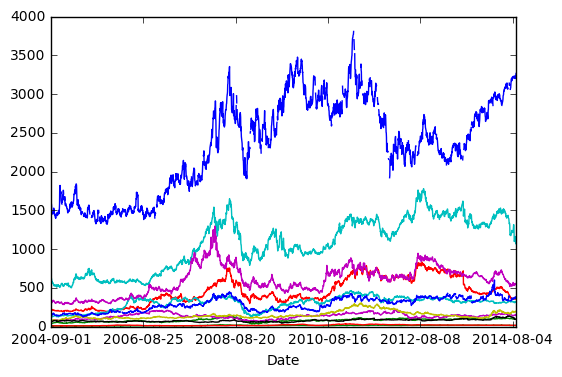

In [14]:
commodities_price_series.plot()
plt.legend().remove()
plt.show()

** Because the commodities are listed in dollars, so their rises and drops were not on the same scale. Now I will adjust their scale by dividing all price series by the price on the first day, so all instruments start from 1 **

In [15]:
commodities_price_series = commodities_price_series / commodities_price_series.iloc[0]
commodities_price_series.head()

Ticker,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LH1_COMB_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Date,,,,,,,,,,,,
2004-09-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000
2004-09-02,0.968902,1.042508,1.010846,0.996870,1.137124,1.021409,1.012149,1.024476,1.014194,1.001227,1.0152,1.028203
2004-09-03,0.963415,1.046545,0.984816,0.977308,1.030100,1.035912,0.996963,0.979021,0.996129,1.006135,0.9968,0.992748
2004-09-07,0.945122,1.034671,0.960954,0.969875,1.050167,0.997238,1.002278,0.975524,0.967742,0.988957,0.9724,0.981467
2004-09-08,0.898171,1.026360,0.950108,0.993349,1.033445,0.980663,0.987092,0.989510,0.980645,0.960736,0.9488,0.988719


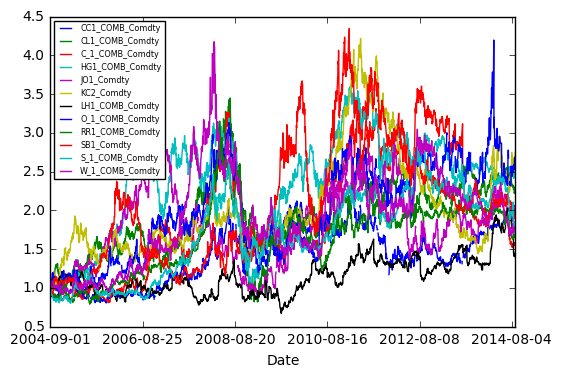

In [16]:
commodities_price_series.plot()
plt.legend(fontsize='xx-small', loc='upper left')
plt.show()

** I am interested in seeing what the final returns were for each asset **

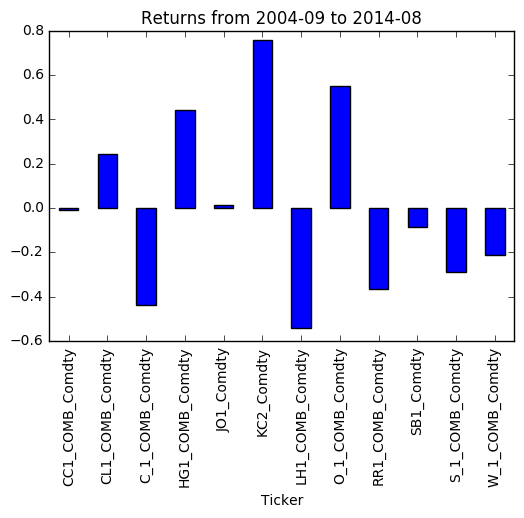

In [17]:
final_returns = commodities_price_series.iloc[-1] - commodities_price_series.iloc[0]
(final_returns - 1).plot.bar()
plt.yticks()
#plt.axhline(y=1, color='black')
plt.title('Returns from 2004-09 to 2014-08')
plt.show()

In [18]:
commodities_price_series.apply(blank_cell_percentage, axis='index')

Ticker
CC1_COMB_Comdty    6.35
CL1_COMB_Comdty    0.12
C_1_COMB_Comdty    0.04
HG1_COMB_Comdty    0.16
JO1_Comdty         2.18
KC2_Comdty         0.32
LH1_COMB_Comdty    0.12
O_1_COMB_Comdty    3.73
RR1_COMB_Comdty    4.72
SB1_Comdty         0.32
S_1_COMB_Comdty    0.04
W_1_COMB_Comdty    0.08
dtype: float64

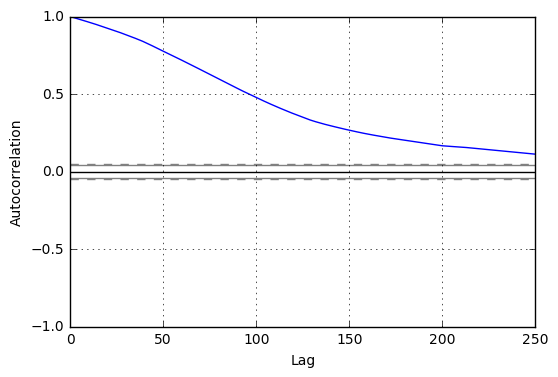

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(commodities_price_series.CL1_COMB_Comdty.dropna())
plt.xlim(0, 250)
plt.show()

In [ ]:
!conda install pandas=0.18.1

In [6]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(commodities_price_series.CL1_COMB_Comdty.dropna(), order=(5, 1, 0))
model_fit = model.fit(disp=0)
print model_fit.summary()

ImportError: cannot import name TimeSeries

In [19]:
# Now I interpolate missing data usinng library methods. But I should note here that it is very important to choose a 
# good interpolation method. As of now I am using linear interpolation, the simplest model
#commodities_price_series = commodities_price_series.interpolate()

In [20]:
#commodities_price_series.apply(blank_cell_percentage, axis='index')

** In the next step, I produce the ARIMA factor of the price series of each instrument **

In [ ]:
!conda install -c conda-forge statsmodels